# Pre-amble

In [1]:
# loading the required packages
import pandas as pd
import numpy as np
import datetime
import random
import re
import os
import plotnine
from plotnine import *

# for repeated printouts 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# to custom displays of row-column df printouts
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Data import and basic dataset information

## Intake data

Here, we load the analysis-ready intake data, and print out some of the basic information about the data:

In [2]:
# loading the intake data
intake_analysis = pd.read_csv('../data/csv/intake_analysis.csv')

# then, we filter only for the black/white defendants 
intake_bw = intake_analysis[(intake_analysis.is_white == True) | 
                            (intake_analysis.is_black == True)].copy()

In [3]:
# printing out the basic info
intake_bw.shape
intake_bw.dtypes

(369399, 40)

Unnamed: 0                   int64
CASE_ID                      int64
CASE_PARTICIPANT_ID          int64
RECEIVED_DATE               object
OFFENSE_CATEGORY            object
PARTICIPANT_STATUS          object
AGE_AT_INCIDENT            float64
RACE                        object
GENDER                      object
INCIDENT_CITY               object
INCIDENT_BEGIN_DATE         object
INCIDENT_END_DATE           object
LAW_ENFORCEMENT_AGENCY      object
LAW_ENFORCEMENT_UNIT        object
ARREST_DATE                 object
FELONY_REVIEW_DATE          object
FELONY_REVIEW_RESULT        object
UPDATE_OFFENSE_CATEGORY     object
is_black                    object
is_hispanic                   bool
is_white                    object
is_hisp                    float64
is_female                   object
age_cleaned                float64
felony_review_date          object
felony_review_year         float64
felony_review_month        float64
felony_review_day          float64
felony_review_ym    

In [4]:
# printing out the head of the df
intake_bw.sample(10)

,Unnamed: 0,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PARTICIPANT_STATUS,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,UPDATE_OFFENSE_CATEGORY,is_black,is_hispanic,is_white,is_hisp,is_female,age_cleaned,felony_review_date,felony_review_year,felony_review_month,felony_review_day,felony_review_ym,sa_office_period,sa_timedelta,sa_timedelta_days,sa_timedelta_wk,BRA_period,BRA_timedelta,BRA_timedelta_days,BRA_timedelta_wk,fr_is_approved,fr_is_rejected,fr_is_investigated
248408,248408,553607427770,400650045420,03/31/2016,Retail Theft,NaN,43.0,Black,Male,Chicago,03/31/2016,NaN,CHICAGO PD,NaN,03/31/2016 07:30:00 PM,03/31/2016,Rejected,Retail Theft,True,False,False,NaN,False,43.0,2016-03-31,2016.0,3.0,31.0,2016-03,False,-9.0,-245.0,-35.0,False,-15.0,-438.0,-62.0,False,True,False
52935,52935,516138206561,358364583027,02/02/2012,Narcotics,Approved,23.0,White,Male,Westchester,01/26/2012,NaN,WESTCHESTER PD,NaN,01/26/2012 09:30:00 PM,NaN,NaN,Narcotics,False,False,True,NaN,False,23.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,False
74520,74520,520253247006,362628682664,07/10/2012,Possession of Stolen Motor Vehicle,Approved,29.0,Black,Male,Chicago,07/08/2012,07/09/2012,BERWYN PD,NaN,07/10/2012 12:00:00 AM,07/10/2012,Approved,Possession of Stolen Motor Vehicle,True,False,False,NaN,False,29.0,2012-07-10,2012.0,7.0,10.0,2012-07,False,-53.0,-1605.0,-229.0,False,-59.0,-1798.0,-256.0,True,False,False
266491,266491,557182962699,404947288837,09/19/2016,Retail Theft,Approved,63.0,Black,Male,Northlake,09/19/2016,09/19/2016,NORTHLAKE PD,NaN,09/19/2016 10:18:00 AM,09/19/2016,Approved,Retail Theft,True,False,False,NaN,False,63.0,2016-09-19,2016.0,9.0,19.0,2016-09,False,-3.0,-73.0,-10.0,False,-9.0,-266.0,-38.0,True,False,False
205235,205235,545129151039,390774306832,03/20/2015,Narcotics,Approved,29.0,White,Male,Calumet City,03/19/2015,NaN,CALUMET CITY PD,NaN,03/19/2015 12:31:00 AM,NaN,NaN,Narcotics,False,False,True,NaN,False,29.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,False
388693,388693,581564805526,433280512340,11/14/2019,Robbery,Approved,29.0,Black,Male,Chicago,11/13/2019,NaN,CHICAGO PD,NaN,11/13/2019 07:07:00 PM,11/14/2019,Approved,Robbery,True,False,False,NaN,False,29.0,2019-11-14,2019.0,11.0,14.0,2019-11,True,35.0,1078.0,154.0,True,29.0,885.0,126.0,True,False,False
93195,93195,523827810903,366402826755,11/19/2012,Narcotics,Approved,53.0,Black,Male,Ford Heights,11/14/2012,NaN,LYNWOOD PD,NaN,11/14/2012 08:29:00 PM,NaN,NaN,Narcotics,True,False,False,NaN,False,53.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,False
456392,456392,595797030924,450946931853,04/14/2022,UUW - Unlawful Use of Weapon,Approved,27.0,Black,Male,Orland Park,04/13/2022,NaN,ORLAND PARK PD,NaN,04/13/2022 07:30:00 PM,04/14/2022,Approved,UUW - Unlawful Use of Weapon,True,False,False,NaN,False,27.0,2022-04-14,2022.0,4.0,14.0,2022-04,True,64.0,1960.0,280.0,True,58.0,1767.0,252.0,True,False,False
281777,281777,560216661637,408593058482,02/23/2017,Narcotics,Approved,25.0,Black,Male,Chicago,02/16/2017,NaN,CHICAGO PD,District 11 - Harrison,02/16/2017 09:50:00 AM,NaN,NaN,Narcotics,True,False,False,NaN,False,25.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,False
124948,124948,529808398495,373039984115,07/08/2013,Narcotics,Approved,44.0,Black,Male,Chicago,07/02/2013,NaN,CHICAGO PD,District 7 - Englewood,07/02/2013 01:21:00 PM,NaN,NaN,Narcotics,True,False,False,NaN,False,44.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,False,NaN,NaN,NaN,False,False,False


## Sentencing data

Here, we'll load our analysis-ready sentencing data, and print out some of the basic information about the data:

In [5]:
# loading the analysis-ready dataset
sentencing_analysis = pd.read_csv('../data/csv/sentencing_analysis.csv')

# we then filter for only black/white defendants
sentencing_bw = sentencing_analysis[(sentencing_analysis.is_black == True) | 
                                    (sentencing_analysis.is_white == True)].copy()

C:\Users\Sean Hambali\AppData\Local\Temp\ipykernel_14528\1287713787.py:2: DtypeWarning: Columns (10,11,14,25) have mixed types. Specify dtype option on import or set low_memory=False.


In [6]:
# printing out basic dataset info
sentencing_bw.dtypes

CASE_ID                                  int64
CASE_PARTICIPANT_ID                      int64
RECEIVED_DATE                           object
OFFENSE_CATEGORY                        object
PRIMARY_CHARGE_FLAG                       bool
CHARGE_ID                                int64
CHARGE_VERSION_ID                        int64
DISPOSITION_CHARGED_OFFENSE_TITLE_x     object
CHARGE_COUNT                             int64
DISPOSITION_DATE                        object
DISPOSITION_CHARGED_CHAPTER             object
DISPOSITION_CHARGED_ACT                 object
DISPOSITION_CHARGED_SECTION             object
DISPOSITION_CHARGED_CLASS               object
DISPOSITION_CHARGED_AOIC                object
CHARGE_DISPOSITION                      object
CHARGE_DISPOSITION_REASON               object
SENTENCE_JUDGE                          object
SENTENCE_COURT_NAME                     object
SENTENCE_COURT_FACILITY                 object
SENTENCE_PHASE                          object
SENTENCE_DATE

In [7]:
# printing a sample of the dataset
sentencing_analysis.sample(n=10)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE_x,CHARGE_COUNT,DISPOSITION_DATE,DISPOSITION_CHARGED_CHAPTER,DISPOSITION_CHARGED_ACT,DISPOSITION_CHARGED_SECTION,DISPOSITION_CHARGED_CLASS,DISPOSITION_CHARGED_AOIC,CHARGE_DISPOSITION,CHARGE_DISPOSITION_REASON,SENTENCE_JUDGE,SENTENCE_COURT_NAME,SENTENCE_COURT_FACILITY,SENTENCE_PHASE,SENTENCE_DATE,SENTENCE_TYPE,CURRENT_SENTENCE_FLAG,COMMITMENT_TYPE,COMMITMENT_TERM,COMMITMENT_UNIT,LENGTH_OF_CASE_in_Days,AGE_AT_INCIDENT,RACE,GENDER,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_black,is_hisp,is_white,is_female,age_cleaned,sentence_date,sentence_year,sentence_month,sentence_day,sentence_ym,sa_office_period,sa_timedelta,sa_timedelta_days,sa_timedelta_wk,BRA_period,BRA_timedelta,BRA_timedelta_days,BRA_timedelta_wk,sentencing_num,sentencing_term_d,sentencing_term_y,is_incarcerated,is_on_probation,regrouped_offense,eligible_offense,DISPOSITION_CHARGED_OFFENSE_TITLE_y,uccs_code,probability,mfj_code,ncrp_code,ncic_code,nibrs_code,charge_desc,offense_category_code,offense_category_desc,offense_type_code,offense_type_desc
146182,564860720448,414064736512,09/28/2017 12:00:00 AM,DUI,True,10268149081385,1042152500869,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,1,05/28/2019 12:00:00 AM,625,5,11-501(a),4,0014717,Finding Guilty,NaN,William Raines,District 1 - Chicago,26TH Street,Original Sentencing,05/28/2019 12:00:00 AM,Prison,True,Illinois Department of Corrections,1.0,Year(s),559.0,39.0,White [Hispanic or Latino],Male,Chicago,09/28/2017 12:00:00 AM,NaN,CHICAGO PD,NaN,09/28/2017 06:27:00 PM,09/28/2017 12:00:00 AM,Approved,11/15/2017 12:00:00 AM,Aggravated DUI,False,True,False,0.0,39.0,2019-05-28,2019,5,28,2019-05,True,29,908,129,True,23,715,102,1.0,365.0,1.000000,True,False,DUI,True,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,4020,0.999360,350,565,5404,NaN,Driving Under the Influence of Alcohol,60,Driving Under the Influence,4,DUI Offense
98903,542462890702,387675501881,11/23/2014 12:00:00 AM,Aggravated DUI,True,9508260973968,963638491564,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,1,03/28/2017 12:00:00 AM,625,5,11-501(a),4,14716,Plea Of Guilty,NaN,James Michael Obbish,District 1 - Chicago,26TH Street,Original Sentencing,03/27/2017 12:00:00 AM,Probation,True,Probation,1.0,Year(s),738.0,38.0,White [Hispanic or Latino],Female,Chicago,11/23/2014 12:00:00 AM,NaN,CHICAGO PD,District 25 - Grand Central,11/23/2014 03:10:00 AM,11/23/2014 12:00:00 AM,Approved,03/20/2015 12:00:00 AM,Aggravated DUI,False,True,False,1.0,38.0,2017-03-27,2017,3,27,2017-03,True,3,116,16,False,-3,-77,-11,1.0,365.0,1.000000,False,True,DUI,True,AGGRAVATED DRIVING UNDER THE INFLUENCE OF ALCOHOL,4020,0.999360,350,565,5404,NaN,Driving Under the Influence of Alcohol,60,Driving Under the Influence,4,DUI Offense
117721,550962530143,397489799840,11/20/2015 12:00:00 AM,Other Offense,True,9777651243403,991412002472,DIRECT CRIMINAL CONTEMPT,1,12/05/2016 12:00:00 AM,720,5,1-3,O,0011142,Plea Of Guilty,NaN,Luciano Panici,District 6 - Markham,Markham Courthouse,Original Sentencing,12/05/2016 12:00:00 AM,Prison,True,Illinois Department of Corrections,3.0,Year(s),NaN,NaN,White [Hispanic or Latino],Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Offense,False,True,False,0.0,NaN,2016-12-05,2016,12,5,2016-12,True,0,4,0,False,-6,-189,-27,3.0,1095.0,3.000000,True,False,Other Offense,False,DIRECT CRIMINAL CONTEMPT,5080,0.998786,400,530,5001;5002;5003;5004;5005;5006;5007;5008;5009;5...,500,Contempt of Court/Violate Court Order,69,Contempt of court,5,Public Order
91991,539500077119,384235980716,07/20/2014 12:00:00 AM,Narcotics,True,9427734578489,955433531158,RESIST/PC OFF/CORR EMP/FRFTR,1,08/13/2014 12:00:00 AM,720,5,31-1(a),A,0014798,Plea Of Guilty,NaN,Geary W Kull,District 4 - Maywood,Maywood Courthou

In [8]:
# what's the shape of the data? 
print("Data shape: " + str(sentencing_bw.shape))

Data shape: (150245, 78)


# Research questions:

Here, we aim to provide some preliminary tabulations on the following questions:

- Does State Attorney Kim Foxx's entry lead to any changes in black-white felony review approval probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white incarceration probability?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white probability of probation?
- Does State Attorney Kim Foxx's entry lead to any changes in black-white sentencing time?

# Preliminary graphs

## Felony review

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


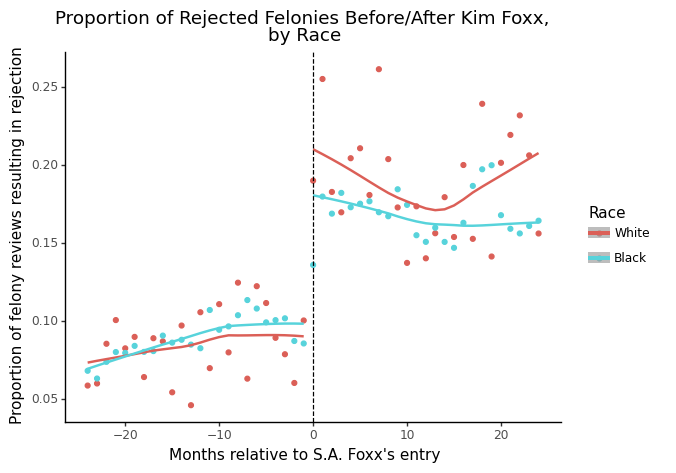

<ggplot: (147452279281)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [9]:
# creating a by-race summary of felony review results
intake_bw_summary = intake_bw.groupby(['sa_timedelta', 'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                           ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_summary = intake_bw_summary[(intake_bw_summary.sa_timedelta >= -24) & 
                                      (intake_bw_summary.sa_timedelta <= 24)].copy()

# creating a by-race trend of felony review results
intake_bw_graph = (
    
    ggplot(intake_bw_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                  group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_summary[intake_bw_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to S.A. Foxx's entry", 
         y = 'Proportion of felony reviews resulting in rejection', 
         title = 'Proportion of Rejected Felonies Before/After Kim Foxx, \nby Race') +
    scale_color_discrete(labels = ['White', 'Black']) +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_graph

# saving the graph
intake_bw_graph.save("../output/intake_bw_graph.png", width = 5, height = 5, dpi = 100)

Creating the same type of graph but differentiating by offense categories (considering the top 5 categories only): 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

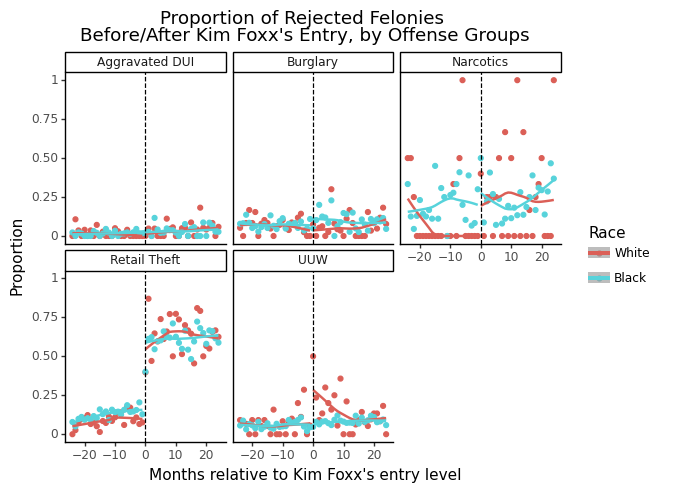

<ggplot: (147461727437)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/intake_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [10]:
# storing the top 5 offense category in a list
intake_top5_offense = list(intake_bw.UPDATE_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
intake_bw_top5_summary = intake_bw[intake_bw.UPDATE_OFFENSE_CATEGORY.isin(intake_top5_offense)].copy()

# renaming UUW 
intake_bw_top5_summary['UPDATE_OFFENSE_CATEGORY'] = intake_bw_top5_summary.UPDATE_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                               'UUW')

# creating a by-race summary of felony review results
intake_bw_top5_summary = intake_bw_top5_summary.groupby(['sa_timedelta','UPDATE_OFFENSE_CATEGORY', 
                                                         'is_black'])['fr_is_rejected'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
intake_bw_top5_summary = intake_bw_top5_summary[(intake_bw_top5_summary.sa_timedelta >= -24) & 
                                                (intake_bw_top5_summary.sa_timedelta <= 24)].copy()

intake_bw_top5_summary = intake_bw_top5_summary.sort_values(['UPDATE_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
intake_bw_top5_graph = (
    
    ggplot(intake_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = intake_bw_top5_summary[intake_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Proportion of Rejected Felonies \nBefore/After Kim Foxx's Entry, by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATE_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
intake_bw_top5_graph

# saving the graph
intake_bw_top5_graph.save("../output/intake_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Incarceration gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


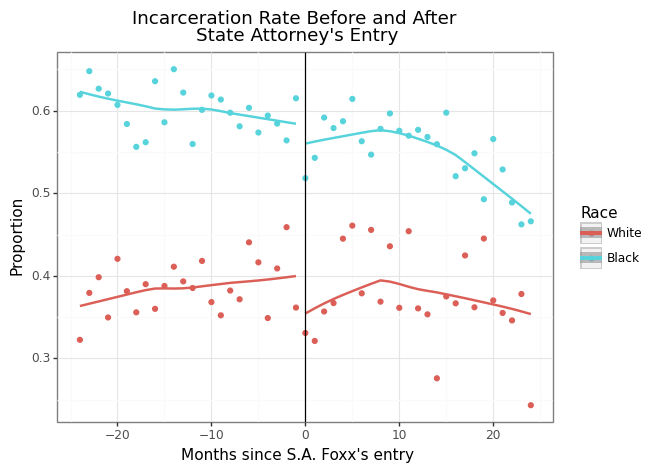

<ggplot: (147462445285)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [11]:
# producing a by-race summary of incarceration proportion
incarc_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_incarcerated'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
incarc_bw_summary = incarc_bw_summary[(incarc_bw_summary.sa_timedelta >= -24) & 
                                      (incarc_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
incarc_bw_graph = (
    ggplot(incarc_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = incarc_bw_summary[incarc_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion", 
         title = "Incarceration Rate Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
incarc_bw_graph

# exporting the plot
incarc_bw_graph.save("../output/incarc_bw_graph.png", width = 5, height = 5, dpi = 100)

Looking at specific offense categories: 

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

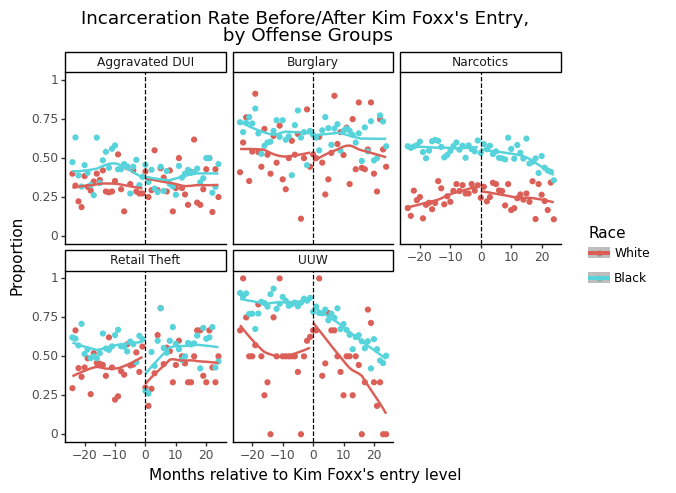

<ggplot: (147462534599)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_top5_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals

In [12]:
# storing the top 5 offense category in a list
incarc_top5_offense = list(sentencing_bw.UPDATED_OFFENSE_CATEGORY.value_counts().reset_index()['index'][0:5])

# filtering for top 5 offenses 
incarc_bw_top5_summary = sentencing_bw[sentencing_bw.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)].copy()

# renaming UUW 
incarc_bw_top5_summary['UPDATED_OFFENSE_CATEGORY'] = incarc_bw_top5_summary.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                                 'UUW')

# creating a by-race summary of felony review results
incarc_bw_top5_summary = incarc_bw_top5_summary.groupby(['sa_timedelta','UPDATED_OFFENSE_CATEGORY', 
                                                         'is_black'])['is_incarcerated'].agg([('prop', 'mean'), 
                                                                                             ('n', 'sum')]).reset_index()

# filtering to specific timedelta
incarc_bw_top5_summary = incarc_bw_top5_summary[(incarc_bw_top5_summary.sa_timedelta >= -24) & 
                                                (incarc_bw_top5_summary.sa_timedelta <= 24)].copy()

incarc_bw_top5_summary = incarc_bw_top5_summary.sort_values(['UPDATED_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
incarc_bw_top5_graph = (
    
    ggplot(incarc_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = incarc_bw_top5_summary[incarc_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Incarceration Rate Before/After Kim Foxx's Entry,\n by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATED_OFFENSE_CATEGORY') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
incarc_bw_top5_graph

# saving the graph
incarc_bw_top5_graph.save("../output/incarc_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Incarceration gaps by race and gender

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

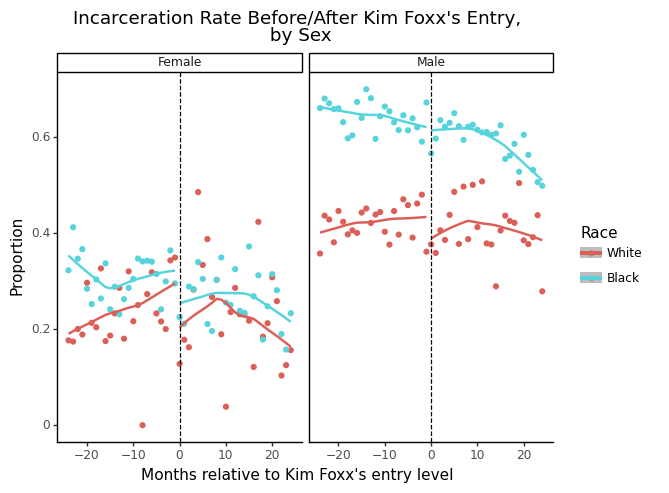

<ggplot: (147461999382)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/incarc_bw_sex_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals 

In [13]:
# creating a by-race summary of felony review results
incarc_bw_sex_summary = sentencing_bw.groupby(['sa_timedelta','is_female', 
                                               'is_black'])['is_incarcerated'].agg([('prop', 'mean'), 
                                                                                    ('n', 'sum')]).reset_index()

# filtering to specific timedelta
incarc_bw_sex_summary = incarc_bw_sex_summary[(incarc_bw_sex_summary.sa_timedelta >= -24) & 
                                              (incarc_bw_sex_summary.sa_timedelta <= 24)].copy()

incarc_bw_sex_summary = incarc_bw_sex_summary.sort_values(['is_female', 'is_black', 'sa_timedelta'])

# renaming the gender group
incarc_bw_sex_summary['sex'] = np.where(incarc_bw_sex_summary.is_female == 1, "Female", "Male")

# creating a by-race trend of felony review results
incarc_bw_sex_graph = (
    
    ggplot(incarc_bw_sex_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = incarc_bw_sex_summary[incarc_bw_sex_summary.sa_timedelta < 0]) +
    geom_smooth(data = incarc_bw_sex_summary[incarc_bw_sex_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Incarceration Rate Before/After Kim Foxx's Entry,\n by Sex") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('sex') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
incarc_bw_sex_graph

# saving the graph
incarc_bw_sex_graph.save("../output/incarc_bw_sex_graph.png", width = 5, height = 5, dpi = 125)

## Probation gaps

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


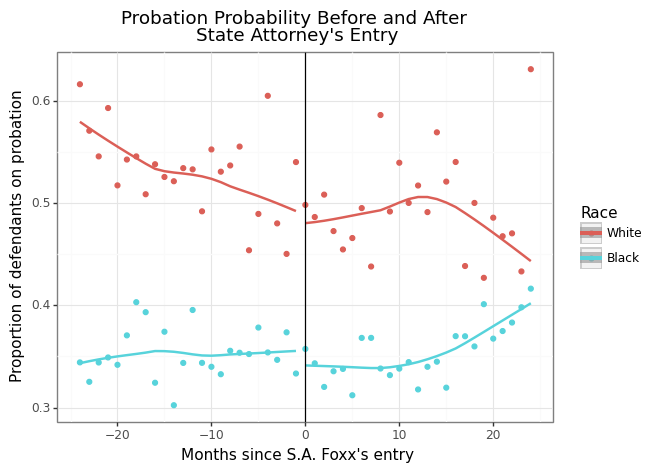

<ggplot: (147461851880)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [14]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# creating a time trend graph, by race
probation_gap_bw = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop', color = 'is_black')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Proportion of defendants on probation", 
         title = "Probation Probability Before and After \nState Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw

# exporting the plot
probation_gap_bw.save("../output/probation_gap_bw.png", width = 5, height = 5, dpi = 100)

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


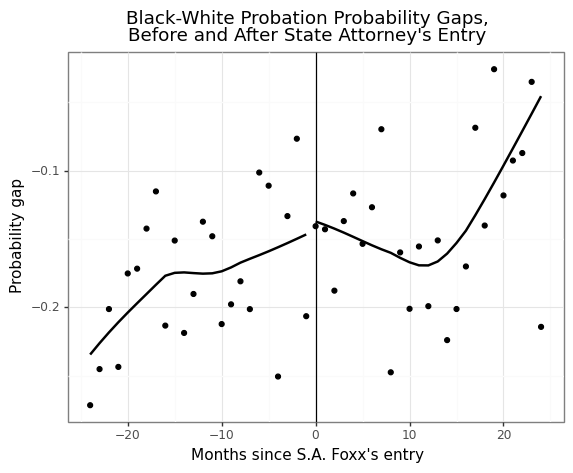

<ggplot: (147462947223)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/probation_gap_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [15]:
# producing a by-race summary of probation proportion
sentencing_bw_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['is_on_probation'].agg([('prop', 'mean'), ('n', 'size')]).reset_index()

# filtering to specific timedelta
sentencing_bw_summary = sentencing_bw_summary[(sentencing_bw_summary.sa_timedelta >= -24) & 
                                              (sentencing_bw_summary.sa_timedelta <= 24)].copy()

# preparing the wide data
sentencing_bw_summary = pd.pivot(sentencing_bw_summary, index=['sa_timedelta'], columns='is_black', values = ['prop', 'n']).reset_index()
new_names = ['sa_timedelta', 'prop_white', 'prop_black', 'n_white', 'n_black']
sentencing_bw_summary.columns = new_names
sentencing_bw_summary['prop_bw_gap'] = sentencing_bw_summary['prop_black'] - sentencing_bw_summary['prop_white'] 

# plotting
probation_gap_bw2 = (
    ggplot(sentencing_bw_summary, aes(x = 'sa_timedelta', y = 'prop_bw_gap')) + 
    geom_point() + 
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] < 0]) +
    geom_smooth(data = sentencing_bw_summary[sentencing_bw_summary['sa_timedelta'] >= 0]) +
    theme_bw() + 
    labs(x = "Months since S.A. Foxx's entry", 
         y = "Probability gap", 
         title = "Black-White Probation Probability Gaps,\nBefore and After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) + 
    guides(color = guide_legend(title = 'Race')) + 
    geom_vline(xintercept = 0)
)

# showing the plot
probation_gap_bw2

# exporting the plot
probation_gap_bw2.save("../output/probation_gap_bw2.png", width = 5, height = 5, dpi = 100)

Plotting the overall probation rate, by offense groups and black-white:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

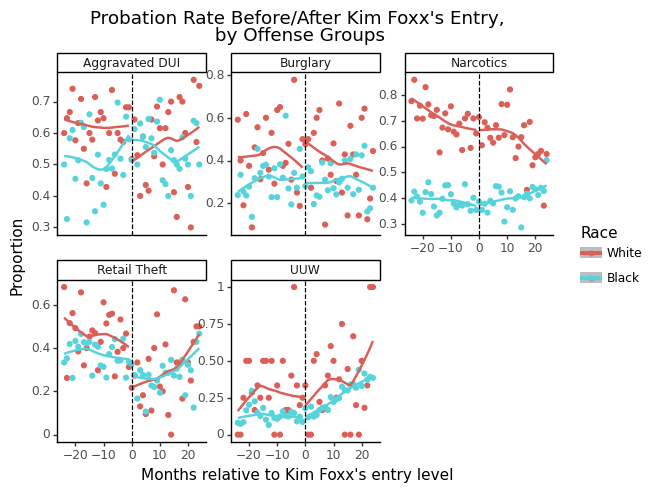

<ggplot: (147463418790)>

In [16]:
# filtering for top 5 offenses 
prob_bw_top5_summary = sentencing_bw[sentencing_bw.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)].copy()

# renaming UUW 
prob_bw_top5_summary['UPDATED_OFFENSE_CATEGORY'] = prob_bw_top5_summary.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon',
                                                                                                             'UUW')

# # creating a by-race summary of felony review results
prob_bw_top5_summary = prob_bw_top5_summary.groupby(['sa_timedelta','UPDATED_OFFENSE_CATEGORY', 
                                                     'is_black'])['is_on_probation'].agg([('prop', 'mean'), 
                                                                                          ('n', 'sum')]).reset_index()

# filtering to specific timedelta
prob_bw_top5_summary = prob_bw_top5_summary[(prob_bw_top5_summary.sa_timedelta >= -24) & 
                                            (prob_bw_top5_summary.sa_timedelta <= 24)].copy()

prob_bw_top5_summary = prob_bw_top5_summary.sort_values(['UPDATED_OFFENSE_CATEGORY', 'is_black', 'sa_timedelta'])

# creating a by-race trend of felony review results
prob_bw_top5_graph = (
    
    ggplot(prob_bw_top5_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                     group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = prob_bw_top5_summary[prob_bw_top5_summary.sa_timedelta < 0]) +
    geom_smooth(data = prob_bw_top5_summary[prob_bw_top5_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Probation Rate Before/After Kim Foxx's Entry,\n by Offense Groups") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('UPDATED_OFFENSE_CATEGORY', scales = "free_y") +
    theme_classic() +
    theme(panel_spacing=.25) +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
prob_bw_top5_graph

# # saving the graph
# prob_bw_top5_graph.save("../output/prob_bw_top5_graph.png", width = 5, height = 5, dpi = 100)

## Probation gaps by race and gender

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

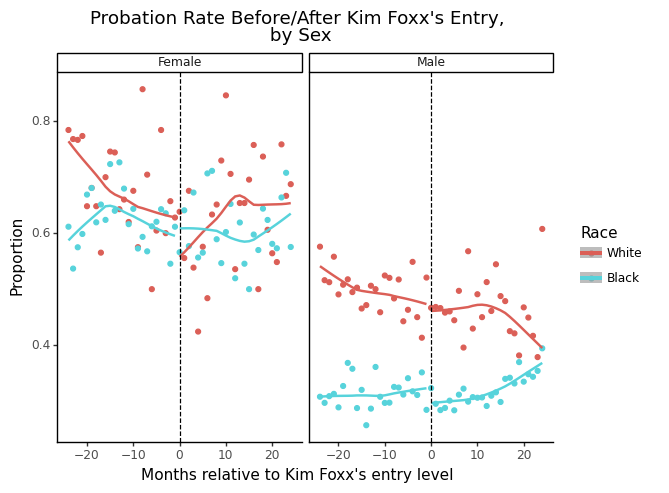

<ggplot: (147462765529)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/prob_bw_sex_graph.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals ar

In [17]:
# creating a by-race summary of felony review results
prob_bw_sex_summary = sentencing_bw.groupby(['sa_timedelta','is_female', 
                                             'is_black'])['is_on_probation'].agg([('prop', 'mean'), 
                                                                                  ('n', 'sum')]).reset_index()

# filtering to specific timedelta
prob_bw_sex_summary = prob_bw_sex_summary[(prob_bw_sex_summary.sa_timedelta >= -24) & 
                                              (prob_bw_sex_summary.sa_timedelta <= 24)].copy()

prob_bw_sex_summary = prob_bw_sex_summary.sort_values(['is_female', 'is_black', 'sa_timedelta'])

# renaming the gender group
prob_bw_sex_summary['sex'] = np.where(prob_bw_sex_summary.is_female == 1, "Female", "Male")

# creating a by-race trend of felony review results
prob_bw_sex_graph = (
    
    ggplot(prob_bw_sex_summary, aes(x = 'sa_timedelta', y = 'prop', 
                                       group = 'is_black', color = 'is_black')) +
    geom_point() +
    geom_smooth(data = prob_bw_sex_summary[prob_bw_sex_summary.sa_timedelta < 0]) +
    geom_smooth(data = prob_bw_sex_summary[prob_bw_sex_summary.sa_timedelta >= 0]) +
    geom_vline(xintercept = 0, linetype = "dashed") +
    labs(x = "Months relative to Kim Foxx's entry level", 
         y = 'Proportion', 
         title = "Probation Rate Before/After Kim Foxx's Entry,\n by Sex") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap('sex') +
    theme_classic() +
    guides(color = guide_legend(title = 'Race'))
)

# plotting the graph 
prob_bw_sex_graph

# saving the graph
prob_bw_sex_graph.save("../output/prob_bw_sex_graph.png", width = 5, height = 5, dpi = 125)

## Sentencing time

Plotting the overall sentencing time, by black-white:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


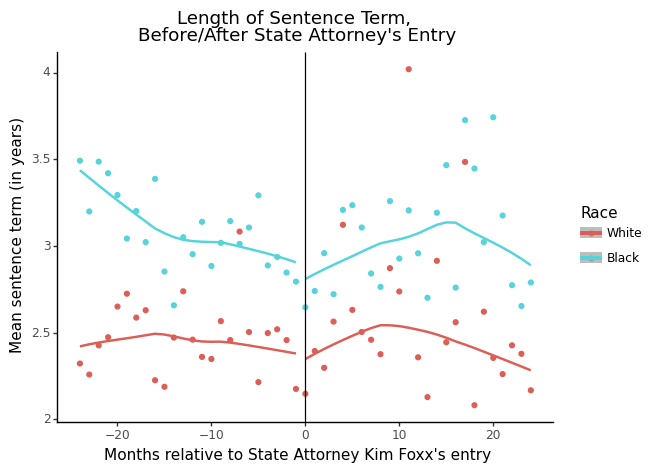

<ggplot: (147462336522)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/sentencing_term_bw.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


In [18]:
# group by time periods 
sentence_time_summary = sentencing_bw.groupby(['sa_timedelta', 'is_black'])['sentencing_term_y'].agg([('mean_sentence', 'mean'), 
                                                                                                      ('median_sentence', 'median'), 
                                                                                                      ('n','size')]).reset_index()

# filtering to certain bandwidth
sentence_time_summary = sentence_time_summary[(sentence_time_summary.sa_timedelta >= -24) & 
                                              (sentence_time_summary.sa_timedelta <= 24)]

# plotting the results
sentencing_term_bw = (
    ggplot(sentence_time_summary, aes(x = "sa_timedelta", y = "mean_sentence", color = "is_black")) +
    geom_point() +
    geom_smooth(data = sentence_time_summary[sentence_time_summary.sa_timedelta < 0]) +
    geom_smooth(data = sentence_time_summary[sentence_time_summary.sa_timedelta >= 0]) +
    geom_vline(aes(xintercept = 0)) +
    labs(x = "Months relative to State Attorney Kim Foxx's entry", 
         y = "Mean sentence term (in years)", 
         title = "Length of Sentence Term, \nBefore/After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) +
    guides(color = guide_legend(title = "Race")) +
    theme_classic()
)

# showing the plot
sentencing_term_bw

# exporting the plot
sentencing_term_bw.save("../output/sentencing_term_bw.png", width = 5, height = 5, dpi = 100)

Plotting sentencing term by top five offenses:

C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\li

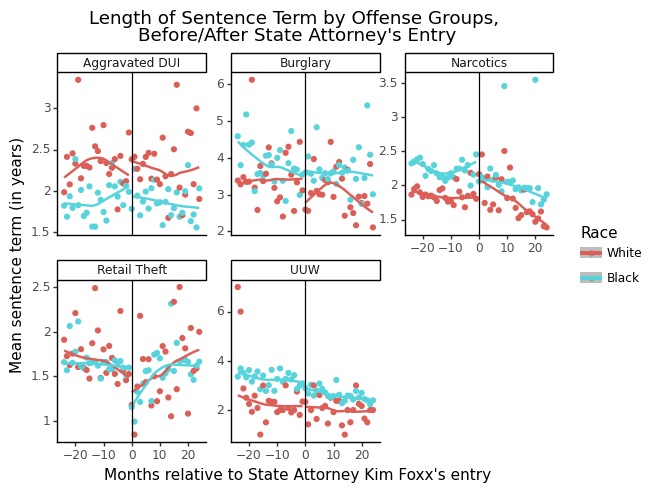

<ggplot: (147462084868)>

C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 5 x 5 in image.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: ../output/sentencing_term_bw2.png
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
C:\Users\Public\anaconda3\lib\site-packages\plotnine\stats\smoothers.py:321: PlotnineWarning: Confidence intervals 

In [19]:
# creating by-group summary of sentencing term 
sentencing_time_summary_byoff = sentencing_bw.groupby(['sa_timedelta', 'is_black', 
                                                       'UPDATED_OFFENSE_CATEGORY'])['sentencing_term_y'].agg([('mean_sentence', 'mean'), 
                                                                                                              ('n', 'size')]).reset_index()

# filtering the summary dataset 
sentencing_time_summary_byoff = sentencing_time_summary_byoff[(sentencing_time_summary_byoff.UPDATED_OFFENSE_CATEGORY.isin(incarc_top5_offense)) &
                                                              (sentencing_time_summary_byoff.sa_timedelta >= -24) & 
                                                              (sentencing_time_summary_byoff.sa_timedelta <= 24)].copy()

# renaming UUW 
sentencing_time_summary_byoff['UPDATED_OFFENSE_CATEGORY'] = sentencing_time_summary_byoff.UPDATED_OFFENSE_CATEGORY.str.replace('UUW - Unlawful Use of Weapon', 
                                                                                                                               'UUW')


# creating the viz 
sentencing_term_bw2 = (
    ggplot(sentencing_time_summary_byoff, aes(x = "sa_timedelta", y = 'mean_sentence', color = "is_black")) +
    geom_point() +
    geom_smooth(data = sentencing_time_summary_byoff[sentencing_time_summary_byoff.sa_timedelta < 0]) +
    geom_smooth(data = sentencing_time_summary_byoff[sentencing_time_summary_byoff.sa_timedelta >= 0]) +
    geom_vline(aes(xintercept = 0)) +
    labs(x = "Months relative to State Attorney Kim Foxx's entry", 
         y = "Mean sentence term (in years)", 
         title = "Length of Sentence Term by Offense Groups, \nBefore/After State Attorney's Entry") +
    scale_color_discrete(labels = ['White', 'Black']) +
    facet_wrap("UPDATED_OFFENSE_CATEGORY", scales = "free_y") +
    theme_classic() +
    theme(panel_spacing=.25) +
    guides(color = guide_legend(title = "Race"))
)

# showing the plot
sentencing_term_bw2

# exporting the plot
sentencing_term_bw2.save("../output/sentencing_term_bw2.png", width = 5, height = 5, dpi = 100)